<a href="https://colab.research.google.com/github/UznetDev/M5-H2-Regression-Competition/blob/main/notebooks/model_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dill

In [22]:
import joblib
import dill as pickle
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
test_data = pd.read_csv('test.csv')
X = test_data[['seeds', 'fruitmass', 'fruitset', 'AverageOfUpperTRange']]

In [5]:
model.predict(test_data)

array([5553.3963988 , 6640.6357677 , 4588.69838155, ..., 5991.8886653 ,
       5500.44023825, 6575.38940199])

In [36]:
sample = X.sample(1, random_state=42)
sample_transformed = model.named_steps['feature_engineer'].transform(sample)
explainer = shap.TreeExplainer(model.named_steps['model'])
shap_values_single = explainer.shap_values(sample_transformed)

In [37]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, sample_transformed)

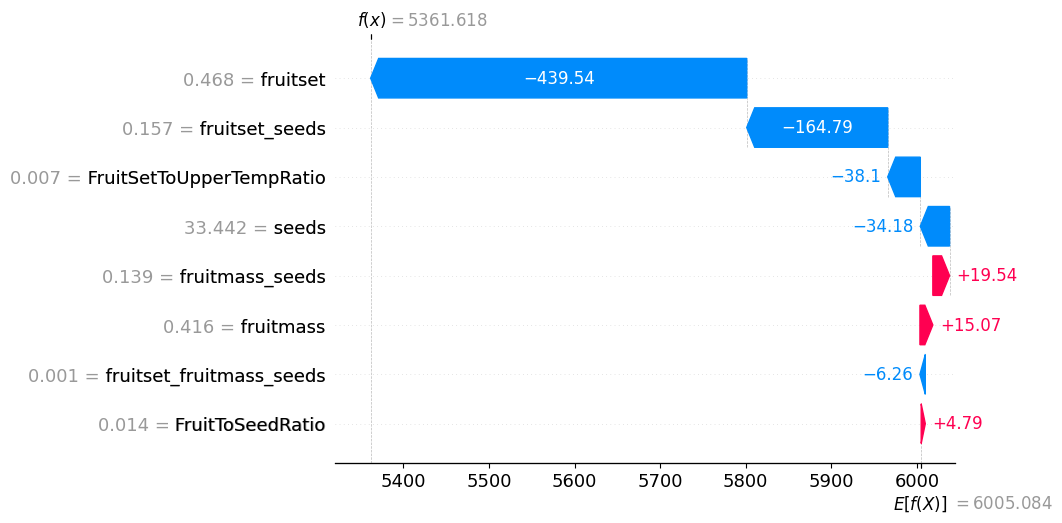

In [39]:
shap.waterfall_plot(shap.Explanation(values=shap_values_single[0],
                                     base_values=explainer.expected_value,
                                     data=sample_transformed.iloc[0]))

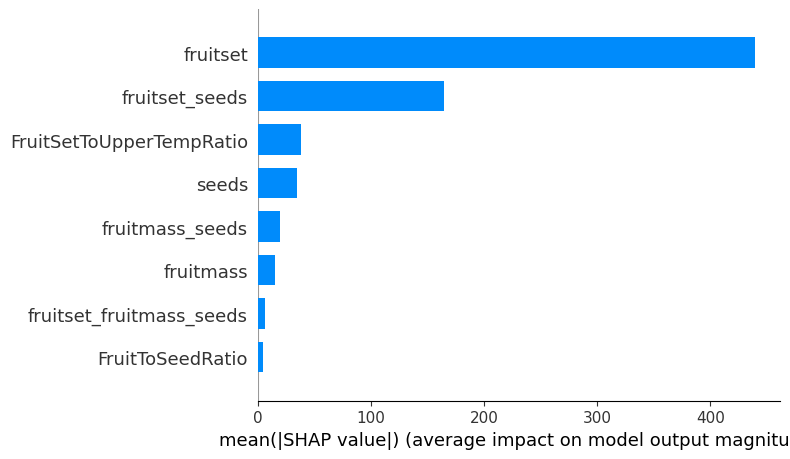

In [25]:
shap.summary_plot(shap_values_single, sample_transformed, plot_type='bar')

In [11]:
explainer = shap.TreeExplainer(model.named_steps['model'])

In [12]:
X_transformed = model.named_steps['feature_engineer'].transform(X.iloc[:100])

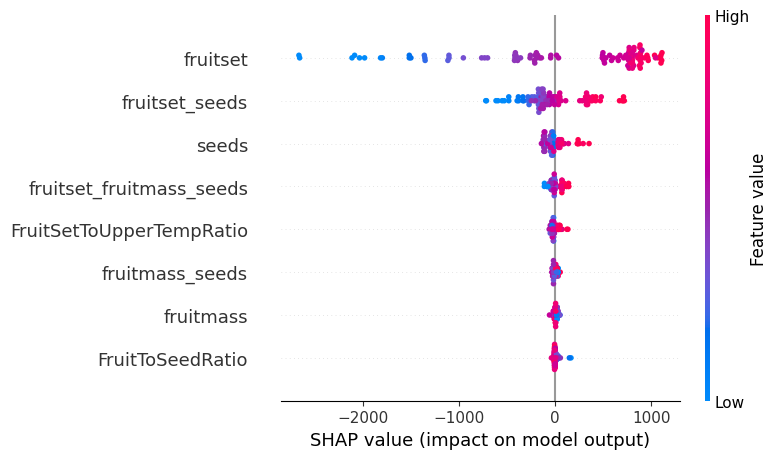

In [13]:
shap_values = explainer.shap_values(X_transformed)
shap.summary_plot(shap_values, X_transformed)

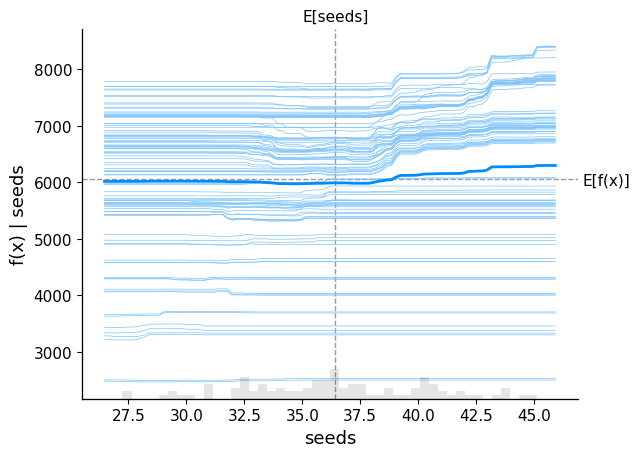

In [27]:
shap.partial_dependence_plot(
    'seeds',
    model.named_steps['model'].predict,
    X_transformed,
    model_expected_value=True,
    feature_expected_value=True
)

## Permutation Importance

In [20]:
perm_importance = permutation_importance(model, X, model.predict(X), n_repeats=5, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

perm_importance_df

,Feature,Importance
2,fruitset,1.866708
0,seeds,0.132993
1,fruitmass,0.007013
3,AverageOfUpperTRange,0.002901


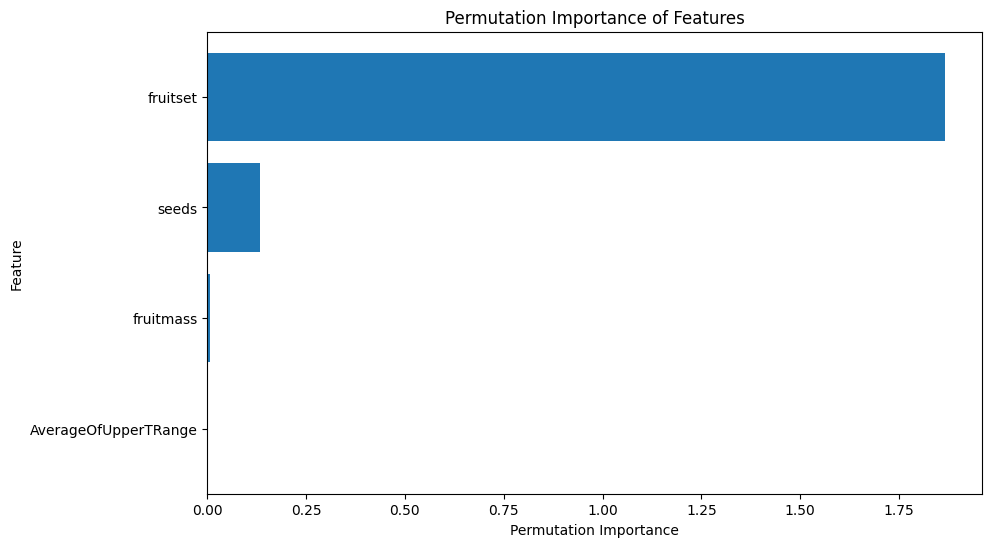

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance of Features')
plt.gca().invert_yaxis()
plt.show()